#PAINEL COVID GYN


```
painel-covid-goiania.herokuapp.com
github.com/wendelmarques/painel-covid-goiania
```



### Objetivo: Criar vizualizações com os dados sobre os casos confirmados da COVID-19 em Goiânia.

##### Os dados utilizados para geração do mapa e dos gráficos, foram retirados dos Informes Epidemiológicos publicados (em PDFs) pela Prefeitura de Goiânia, por meio de uma técnica chamada Data Scraping (algoritmos que realizam a tarefa de extração). São divulgadas apenas informações sobre alguns bairros - os que possuem mais casos confirmados acumulados, por isso, foram extraídos dados de 111 bairros.

#####Para mais informações, acesse: saude.goiania.go.gov.br


<br>
<br>

#### Fontes/ créditos

*    [Brasil.IO - O Brasil em dados libertos](https://brasil.io/dataset/covid19/caso/?search=&date=&state=&city=&place_type=&is_last=&city_ibge_code=5208707&order_for_place=)
*    [Plotly - Repositório](https://github.com/plotly/dash-sample-apps/tree/master/apps)
*   [How to create outstanding animated scatter maps with Plotly and Dash (Medium) - Lamothe Thibaud ](https://towardsdatascience.com/how-to-create-animated-scatter-maps-with-plotly-and-dash-f10bb82d357a)
*    [Deploying Dash or Flask web application on Heroku. Easy CI/CD (Medium) - Lamothe Thibaud](https://towardsdatascience.com/deploying-dash-or-flask-web-application-on-heroku-easy-ci-cd-4111da3170b8)
*    [Official Release of bar_chart_race (Medium) - Ted Petrou
dexplo.org/bar_chart_race](https://medium.com/dunder-data/bar-chart-race-python-package-official-release-78a420e182a2)
*    [Gráfico de Corrida de Barras | Dica Pandas #7 - Programação Dinâmica (YouTube)](https://www.youtube.com/watch?v=rIwxjCnvdcY)
*    [Como utilizar a Google Geocoding API para obter endereços](https://www.devmedia.com.br/como-utilizar-a-google-geocoding-api-para-obter-enderecos/36751)
*    [Python Client for Google Maps Services](https://github.com/googlemaps/google-maps-services-python)
* [Como fazer um Web Scraping com Python](https://goomore.com/blog/web-scraping-python/)

* [Official Release of bar_chart_race](https://medium.com/dunder-data/bar-chart-race-python-package-official-release-78a420e182a2)

* [Corrida de CASOS de COVID no Brasil | Gráfico de Corrida de Barras (Bar Chart Race) | Dica Pandas #7](https://www.youtube.com/watch?v=rIwxjCnvdcY)

* [ACESSANDO RECURSOS NA WEB COM PYTHON](https://pythonhelp.wordpress.com/2013/03/12/acessando-recursos-na-web-com-python/)

* [Como usar o R para escolher um lugar para morar (3) - Converter CEP em coordenadas geográficas](https://sillasgonzaga.github.io/2016-11-18-olx3/#:~:text=Obter%20endere%C3%A7o%20a%20partir%20do%20CEP&text=Sabemos%20que%20quanto%20mais%20dados,%2C%20bairro%2C%20cidade%20e%20estado.&text=%C3%89%20necess%C3%A1rio%20juntar%20todas%20as,de%20endere%C3%A7os%20em%20uma%20s%C3%B3)





---



Criado por Wendel Marques

*   [GitHub](https://www.github.com/WendelMarques)
*   [LinkedIn](https://www.linkedin.com/in/wendelmarques/)
*   [Medium](https://medium.com/@WendelMarques)


# Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Biblioteca e pacotes

In [ ]:
import pandas as pd
import time
import bs4
import requests
from datetime import datetime
!pip install tika
from tika import parser
import numpy as np
import urllib.request #biblioteca usada para consultar uma URL
from bs4 import BeautifulSoup #funções BeautifulSoup para analisar os dados retornados do site
!pip install googlemaps
import googlemaps
import math
import numpy as np
!pip install bar_chart_race
!pip install ffmpeg
import bar_chart_race as bcr
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

# #https://medium.com/dunder-data/bar-chart-race-python-package-official-release-78a420e182a2

  Created wheel for tika: filename=tika-1.24-cp36-none-any.whl size=32884 sha256=1abee174f245bcf2e6bbdeee111eec74e659dc8a1a36e3bba5fe24e599e26298
  Stored in directory: /root/.cache/pip/wheels/73/9c/f5/0b1b738442fc2a2862bef95b908b374f8e80215550fb2a8975
Successfully built tika
  Created wheel for googlemaps: filename=googlemaps-4.4.2-cp36-none-any.whl size=37858 sha256=f17348ca05859679c4a1412c06fb593c6703c8000dae7205d7d5ca4d7e85c441
  Stored in directory: /root/.cache/pip/wheels/f4/21/41/0c84572e21d52bb322f6c299f38ac7cd8ad6d4d6ce23dc3631
Successfully built googlemaps
     |████████████████████████████████| 163kB 3.3MB/s 
  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp36-none-any.whl size=6083 sha256=7aee32fc99fb4a57011d510af5b65738b8cccafff2db96bb9106e8d2a1c4df40
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg


#Data scraping 
`Extração de dados dos Informes Epidemiológicos (PDFs) publicados no site da Prefeitura de Goiânia`

In [ ]:
#acessa a pagina de informes
siteInformes = "https://saude.goiania.go.gov.br/goiania-contra-o-coronavirus/informe-epidemiologico-covid-19/#antigos"
#Consulta o site e retorne o html para a variável 'page'
page = urllib.request.urlopen(siteInformes)
#Parse o html na variável 'page' e armazene-o no formato BeautifulSoup
soup = BeautifulSoup(page, 'html5lib')

In [ ]:
#pecorre cada linha do html de siteInformes e pegar os links dos pdfs
all_links = soup.find_all('a')
urls_pdfs = []
for link in all_links:
    if link.get('href'):
        if link.get('href')[-3:] == 'pdf':
            urls_pdfs.append(link.get('href'))
            
urls_pdfs

['https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-149-29.08.2020-d.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-148-28.08.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-147-27.08.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-146-26.08.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-145-25.08.2020-2.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-nº-144-24.08.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-nº-143-23.08.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-nº-142-22.08.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-nº-141-21.08.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-

In [ ]:
len(urls_pdfs)

200

In [ ]:
len(np.unique(urls_pdfs)) #deve ser igual o numero de informes publicados

149

In [ ]:
#remove link duplicados
urls_pdfs = np.unique(urls_pdfs)

In [ ]:
len(urls_pdfs)

149

In [ ]:
#substitui alguns caracteres para evitar erros
urls_pdfs_modificadas = []
for url in urls_pdfs:
    new_link = url.replace('º', '%C2%BA')
    new_link1 = new_link.replace('padrão', 'padra%CC%83o')
    urls_pdfs_modificadas.append(new_link1)

#debug
i = 0
for i in range(len(urls_pdfs_modificadas)):
    print(i)
    print(urls_pdfs_modificadas[i])  

0
https://goiania.go.gov.br/sms/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-30-02.05.2020.pdf
1
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-1-03-04-2020.pdf
2
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-10-12.04.2020.pdf
3
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-11-13.04.2020.pdf
4
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-12-14.04.2020.pdf
5
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-13-15.04.2020-2.pdf
6
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-14-16.04.2020.pdf
7
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-15-17.04.2020_2.pdf
8
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-16-18.04.2020.pdf
9
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/In

In [ ]:
###############################################################
######### OBJETIVO: LER O HTML E EXTRAIR OS DADOS #############
###############################################################

num_informes = len(urls_pdfs) #quantidades de informes publicados
i = 0
j = 0
conteudos = []
dataset = {}

def pega_data(url):
    indice = 0
    while indice < len(url):
        if url[indice] == '2':
            if url[indice+1] == '0':
                if url[indice+2] == '2':
                    if url[indice+3] == '0':
                        if url[indice+4] != '/':
                            data = url[indice] + url[indice+1]+url[indice+2]+url[indice+3]+'-'+url[indice-3]+url[indice-2]+'-'+url[indice-6]+url[indice-5]
                            # print(data)
                            return data
                
        
        indice+=1

    return '0000-00-00'        



def cria_lista_bairros_e_casos(bairro_casos):
    try:
        num_casos = bairro_casos.split(' ')[-1]
        num_casos = int(num_casos)
        qdt_dig_casos = int (math.log10 (num_casos))+2
        bairro = bairro_casos[:len(bairro_casos)-qdt_dig_casos]
        return [bairro, num_casos]

    except ValueError as e:
        return [0, 0]


for url in urls_pdfs_modificadas:

    if i <= num_informes:
        print(i)
        i+=1
        conteudos.clear()
        conteudos.append(parser.from_file(url))
        time.sleep(8)

        #armazena o conteudo do pdf em conteudos_pdfs.txt (um pdf por vez)
        #repare no conteudos.clear() linhas acima
        arquivo = open('conteudos-pdfs.txt', 'w')
        for linha in conteudos:
            arquivo.write(linha['content']) 
        arquivo.close()

        #pega a data do informe
        data = pega_data(url)
        data = data[:10]
        print(data)

        #abre o arquivo e captura a data em que foi criado
        arquivo = open('conteudos-pdfs.txt', 'r')
        lista = arquivo.readlines()
        arquivo.close()

        df = pd.DataFrame(lista)
        delete_row = df[df[0]=='\n'].index
        df = df.drop(delete_row)
        df.reset_index(inplace=True)
        df.drop(columns=['index'], axis=1, inplace=True)

        row_iterator = df.iterrows()

        while 1:
            try:
                for aux in range(len(df)):
                    linha_atual = next(row_iterator)
                    
                    if 'Setor Bueno' in linha_atual[1][0]:
                        while 1:
                            #cria um dicionario no formato bairro: num_casos
                            ret = cria_lista_bairros_e_casos(linha_atual[1][0])
                            if (ret[0] != 0 and ret[0] != 0):
                                dataset[j] = {'data': data, 'bairro': ret[0], 'num_casos': ret[1]}
                            j+=1
                            #"outros" é a flag usada para parar o loop
                            if 'Outros' in linha_atual[1][0]:                        
                                break  
                            linha_atual = next(row_iterator)            

            except StopIteration as e:
                    print(e)
                    break
    else:
        i+=1




In [ ]:
dataset

{0: {'bairro': 'Setor Bueno ', 'data': '2020-05-30', 'num_casos': 131},
 1: {'bairro': 'Setor Oeste ', 'data': '2020-05-30', 'num_casos': 90},
 2: {'bairro': 'Jardim América ', 'data': '2020-05-30', 'num_casos': 51},
 3: {'bairro': 'Setor Central ', 'data': '2020-05-30', 'num_casos': 46},
 4: {'bairro': 'Jd. Goiás ', 'data': '2020-05-30', 'num_casos': 42},
 5: {'bairro': 'Jd. Guanabara ', 'data': '2020-05-30', 'num_casos': 38},
 6: {'bairro': 'Parque Amazônia ', 'data': '2020-05-30', 'num_casos': 36},
 7: {'bairro': 'Setor Marista ', 'data': '2020-05-30', 'num_casos': 33},
 8: {'bairro': 'Setor Pedro Ludovico ', 'data': '2020-05-30', 'num_casos': 32},
 9: {'bairro': 'Setor Leste Universitário ',
  'data': '2020-05-30',
  'num_casos': 30},
 10: {'bairro': 'Setor Aeroporto ', 'data': '2020-05-30', 'num_casos': 28},
 11: {'bairro': 'Jd. Novo Mundo ', 'data': '2020-05-30', 'num_casos': 28},
 12: {'bairro': 'Setor Bela Vista ', 'data': '2020-05-30', 'num_casos': 22},
 13: {'bairro': 'Setor 

In [ ]:
bairros_e_num_casos = pd.DataFrame(dataset)
bairros_e_num_casos = bairros_e_num_casos.T
bairros_e_num_casos.to_csv('/content/drive/My Drive/Colab Notebooks/covid/dataset-covid-goiania-por-bairro.csv', index=False)
bairros_e_num_casos.to_csv('dataset-covid-goiania-por-bairro.csv', index=False)
bairros_e_num_casos

,data,bairro,num_casos
0,2020-05-02,Setor Bueno,48
1,2020-05-02,Setor Oeste,39
2,2020-05-02,Jd. Goiás,18
3,2020-05-02,Setor Marista,14
4,2020-05-02,Parque Amazônia,14
...,...,...,...
7133,2020-08-24,Setor Candida de Morais,81
7134,2020-08-24,Jd. Liberdade,81
7135,2020-08-24,Setor Novo Planalto,79
7136,2020-08-24,Santo Hilário,79


In [ ]:
np.unique(bairros_e_num_casos['bairro'])

array(['Alphaville Flamboyant ', 'Alto da Glória ', 'Capuava ',
       'Cidade Jardim ', 'Conjunto Primavera ', 'Conjunto Vera Cruz ',
       'Faicalville ', 'Floresta ', 'Goiá ', 'Goiânia 2 ',
       'Jardim América ', 'Jardim das Esmeraldas ', 'Jd. Atlântico ',
       'Jd. Balneário Meia Ponte ', 'Jd. Bela Vista ', 'Jd. Curitiba ',
       'Jd. Europa ', 'Jd. Goiás ', 'Jd. Guanabara ', 'Jd. Guanabara II ',
       'Jd. Guanabara III ', 'Jd. Itaipu ', 'Jd. Liberdade ',
       'Jd. Mariliza ', 'Jd. Nova Esperanca ', 'Jd. Novo Mundo ',
       'Jd. Petrópolis ', 'Jd. Planalto ', 'Jd. Presidente ',
       'Jd. Valência ', 'Jd. Vila Boa ', 'Nova Suiça ', 'Outros ',
       'Outros bairros ', 'Parque Amazônia ', 'Parque Anhanguera ',
       'Parque Atheneu ', 'Parque Industrial João Braz ',
       'Parque Industrial de Goiânia ', 'Parque Oeste Industrial ',
       'Parque Santa Rita ', 'Parque das Amendoeiras ',
       'Parque das Laranjeiras ', 'Portal do Sol II ',
       'Res. Aldeia do Vale

In [ ]:
# 2 = "outros " e "outros bairros"
quantidade_bairros =  len(np.unique(bairros_e_num_casos['bairro'])) - 2
quantidade_bairros

111

# Web scraping (CEPs) e obtenção de coordenadas


######O CEP de cada bairro é extraído do site cep.guiamais.com.br
######O CEP extraído é de uma rua qualquer, não necessariamente de uma rua que seja equidistante de todas as ruas que delimitam o bairro
######Com a utilização de uma API do Google Maps (a partir do CEP), as coordenadas de uma das ruas do bairro são obtidas
##### cep.guiamais.com.br
##### Geocoding API - Google Maps Platform

In [ ]:
dataset_covid_gyn = pd.read_csv('dataset-covid-goiania-por-bairro.csv', encoding = 'utf-8', sep=',')

np.unique(dataset_covid_gyn['bairro'])

array(['Alphaville Flamboyant ', 'Alto da Glória ', 'Capuava ',
       'Cidade Jardim ', 'Conjunto Primavera ', 'Conjunto Vera Cruz ',
       'Faicalville ', 'Floresta ', 'Goiá ', 'Goiânia 2 ',
       'Jardim América ', 'Jardim das Esmeraldas ', 'Jd. Atlântico ',
       'Jd. Balneário Meia Ponte ', 'Jd. Bela Vista ', 'Jd. Curitiba ',
       'Jd. Europa ', 'Jd. Goiás ', 'Jd. Guanabara ', 'Jd. Guanabara II ',
       'Jd. Guanabara III ', 'Jd. Itaipu ', 'Jd. Liberdade ',
       'Jd. Mariliza ', 'Jd. Nova Esperanca ', 'Jd. Novo Mundo ',
       'Jd. Petrópolis ', 'Jd. Planalto ', 'Jd. Presidente ',
       'Jd. Valência ', 'Jd. Vila Boa ', 'Nova Suiça ', 'Outros ',
       'Outros bairros ', 'Parque Amazônia ', 'Parque Anhanguera ',
       'Parque Atheneu ', 'Parque Industrial João Braz ',
       'Parque Industrial de Goiânia ', 'Parque Oeste Industrial ',
       'Parque Santa Rita ', 'Parque das Amendoeiras ',
       'Parque das Laranjeiras ', 'Portal do Sol II ',
       'Res. Aldeia do Vale

In [ ]:
#############################################################################################
####################   OBJETIVO: EXTRAR COORDENADAS A PARTIR DO CEP   #######################
#############################################################################################


##############################################################################################
#Gere uma chave em https://developers.google.com/maps/gmp-get-started e substitua em "YOUR KEY"
##############################################################################################


def normaliza_nomes_bairros(bairro):
    bairro = bairro[:-1]
    bairro = bairro.replace(' ', '+')
    bairro = bairro.replace('Res.', 'Residencial')
    bairro = bairro.replace('Jd.', 'Jardim')
    return bairro 

def pega_cep(html):
    soup = bs4.BeautifulSoup(html)

    todos_ceps_bairro = soup.find_all('a')

    for link in todos_ceps_bairro:
        href = link.get('href')
    
        try:
            if '/cep/' in href:
                cep =  href[5:]
                cod = pega_coordenadas(cep)
                if cod != -1:
                    return [cep, cod]
                            
        except TypeError:
             cep = -1

    return [None, None]

def pega_coordenadas(cep):
    try:
        gmaps = googlemaps.Client(key='YOUR KEY')
        # Geocoding an address
        geocode_result = gmaps.geocode(cep)
        coord = [geocode_result[0]['geometry']['location']['lat'], geocode_result[0]['geometry']['location']['lng']]
        return coord
    
    except (IndexError):
        return -1

def pega_html(num_page, bairro_url):
    cidade = '+goiania+go'
    url_completa = "https://cep.guiamais.com.br/busca/" + bairro_url + cidade + "?page=" + str(num_page)
    response = requests.get(url_completa)
    return response

bairros_gyn_covid= []
bairros_gyn_covid = np.unique(dataset_covid_gyn['bairro'])
bairros_gyn_covid = list(bairros_gyn_covid)

# bairros_gyn_covid.remove('Outros ')
# bairros_gyn_covid.remove('Outros bairros ')


bairros_com_loc = []
i= 0
cep_e_cord = []

#num de pages que o algoritmo pode acessar para pegar os ceps do site 
#cep.guiamais.com.br/busca/NOME+BAIRRO+goiania-go?page=[>>>>>>>>>> N_PAGE <<<<<<<<<<]
N_PAGE = 5 

for bairro in bairros_gyn_covid:
    #alguns nomes dos bairros estao abreviados, entao essa funcao troca, 
    #por exemplo "res." por residencial
    bairro_url = normaliza_nomes_bairros(bairro)

    for i in range(N_PAGE):

        response = pega_html(i, bairro_url)
        cep_e_cord = pega_cep(response.content)

        if cep_e_cord[0]:
            #salva zone: nome do bairro, location lat,log
            bairros_com_loc.append({'bairro': bairro, 'category': 'Confirmed', 'localizacao': str(cep_e_cord[1][0]) + ',' + str(cep_e_cord[1][1])})
            print(bairro) #debug
            print(cep_e_cord[0])
            print(cep_e_cord[1])
            print('\n')
            break

In [ ]:
bairros_e_localizacao = pd.DataFrame(bairros_com_loc)
bairros_e_localizacao.to_csv('/content/drive/My Drive/Colab Notebooks/covid/bairros_e_localizacao.csv', index=False)
bairros_e_localizacao.to_csv('bairros_e_localizacao.csv', index=False)
bairros_e_localizacao

,bairro,cep,localizacao
0,Alphaville Flamboyant,74884-534,"[-16.7070932, -49.2122502]"
1,Alto da Glória,74815-610,"[-16.7206511, -49.2250865]"
2,Capuava,74450-410,"[-16.6645242, -49.316575]"
3,Cidade Jardim,74425-250,"[-16.6761304, -49.3121233]"
4,Conjunto Primavera,74477-207,"[-16.5878046, -49.37404129999999]"
...,...,...,...
100,Vila Redenção,74850-235,"[-16.7192989, -49.2442516]"
101,Vila Regina,74453-460,"[-16.6590214, -49.3343071]"
102,Vila Rosa,74345-020,"[-16.7447479, -49.30284049999999]"
103,Vila Santa Helena,74555-370,"[-16.6577718, -49.2836964]"


#Dataframe que será usada para a plotagem no mapa (merge)


#####[dataset-covid-goiania-por-bairro e bairros-e-localizacao]


In [ ]:
bairros_e_localizacao = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covid/bairros_e_localizacao.csv', encoding = 'utf-8', sep=',')

df_completo = pd.merge(bairros_e_num_casos, bairros_e_localizacao, on='bairro')
df_completo


,data,bairro,num_casos,cep,localizacao
0,2020-05-02,Setor Bueno,48,74223-010,"[-16.6956937, -49.2640252]"
1,2020-04-29,Setor Bueno,45,74223-010,"[-16.6956937, -49.2640252]"
2,2020-04-30,Setor Bueno,48,74223-010,"[-16.6956937, -49.2640252]"
3,2020-05-03,Setor Bueno,52,74223-010,"[-16.6956937, -49.2640252]"
4,2020-05-11,Setor Bueno,73,74223-010,"[-16.6956937, -49.2640252]"
...,...,...,...,...,...
6779,2020-08-19,Setor União,71,74313-310,"[-16.7077888, -49.3042916]"
6780,2020-08-08,Rodoviário,57,74425-700,"[-16.6501031, -49.34822519999999]"
6781,2020-08-09,Rodoviário,57,74425-700,"[-16.6501031, -49.34822519999999]"
6782,2020-08-10,Rodoviário,57,74425-700,"[-16.6501031, -49.34822519999999]"


In [ ]:
df_completo.columns = ['Date', 'Zone', 'Count', 'CEP', 'Location']
df_completo['Category'] = 'Confirmed'
df_completo["Count"] = pd.to_numeric(df_completo["Count"])

df_completo['Location'] = df_completo['Location'].apply(lambda x: x[1:])
df_completo['Location'] = df_completo['Location'].apply(lambda x: x[:-1])
df_completo['Location'] = df_completo['Location'].apply(lambda x: x.replace(" ", ""))

df_completo.to_csv('/content/drive/My Drive/Colab Notebooks/covid/covid-19-goiania-por-bairro-final.csv', index=False)
df_completo.to_csv('covid-19-goiania-por-bairro-final.csv', index=False)
df_completo

,Date,Zone,Count,CEP,Location,Category
0,2020-05-02,Setor Bueno,48,74223-010,"-16.6956937,-49.2640252",Confirmed
1,2020-04-29,Setor Bueno,45,74223-010,"-16.6956937,-49.2640252",Confirmed
2,2020-04-30,Setor Bueno,48,74223-010,"-16.6956937,-49.2640252",Confirmed
3,2020-05-03,Setor Bueno,52,74223-010,"-16.6956937,-49.2640252",Confirmed
4,2020-05-11,Setor Bueno,73,74223-010,"-16.6956937,-49.2640252",Confirmed
...,...,...,...,...,...,...
6779,2020-08-19,Setor União,71,74313-310,"-16.7077888,-49.3042916",Confirmed
6780,2020-08-08,Rodoviário,57,74425-700,"-16.6501031,-49.34822519999999",Confirmed
6781,2020-08-09,Rodoviário,57,74425-700,"-16.6501031,-49.34822519999999",Confirmed
6782,2020-08-10,Rodoviário,57,74425-700,"-16.6501031,-49.34822519999999",Confirmed


#Bar race | por bairro

In [ ]:
df_bar_race = df_completo
df_bar_race.drop(columns=['CEP', 'Category', 'Location'], inplace = True)
df_bar_race


,Date,Zone,Count
0,2020-05-02,Setor Bueno,48
1,2020-04-29,Setor Bueno,45
2,2020-04-30,Setor Bueno,48
3,2020-05-03,Setor Bueno,52
4,2020-05-11,Setor Bueno,73
...,...,...,...
6779,2020-08-19,Setor União,71
6780,2020-08-08,Rodoviário,57
6781,2020-08-09,Rodoviário,57
6782,2020-08-10,Rodoviário,57


In [ ]:
 bairros = np.unique(df_bar_race['Zone'])
 lista_bairros = list(bairros)

In [ ]:
#lista de bairros que não irão aparecer no bar race 
#bairros removidos da lista:

lista_bairros = ['Alphaville Flamboyant ',
 'Alto da Glória ',
 'Capuava ',
 'Cidade Jardim ',
 'Conjunto Primavera ',
 'Faicalville ',
 'Floresta ',
 'Goiá ',
 'Goiânia 2 ',
 'Jardim das Esmeraldas ',
 'Jd. Atlântico ',
 'Jd. Bela Vista ',
 'Jd. Europa ',
 'Jd. Guanabara II ',
 'Jd. Guanabara III ',
 'Jd. Itaipu ',
 'Jd. Liberdade ',
 'Jd. Mariliza ',
 'Jd. Petrópolis ',
 'Jd. Planalto ',
 'Jd. Presidente ',
 'Jd. Vila Boa ',
 'Nova Suiça ',
 'Parque Anhanguera ',
 'Parque Atheneu ',
 'Parque Industrial de Goiânia ',
 'Parque Oeste Industrial ',
 'Parque Santa Rita ',
 'Parque das Amendoeiras ',
 'Parque das Laranjeiras ',
 'Portal do Sol II ',
 'Res. Aldeia do Vale ',
 'Res. Brisas da Mata ',
 'Res. Eldorado ',
 'Res. Goiânia Viva ',
 'Res. Granville ',
 'Res. Itaipú ',
 'Res. Petropolis ',
 'Res. Recanto das Garças ',
 'Res. Recanto do Bosque ',
 'Res. Vale dos Sonhos I ',
 'Rodoviário ',
 'Santa Genoveva ',
 'Santo Hilário ',
 'Setor Aeroporto ',
 'Setor Bela Vista ',
 'Setor Campinas ',
 'Setor Candida de Morais ',
 'Setor Centro Oeste ',
 'Setor Coimbra ',
 'Setor Criméia Leste ',
 'Setor Criméia Oeste ',
 'Setor Estrela Dalva ',
 'Setor Garavelo ',
 'Setor Jaó ',
 'Setor Leste Vila Nova ',
 'Setor Marechal Rondon ',
 'Setor Morada do Sol ',
 'Setor Negrão de Lima ',
 'Setor Norte Ferroviário ',
 'Setor Novo Horizonte ',
 'Setor Novo Planalto ',
 'Setor Parque Tremendão ',
 'Setor Recanto das Minas Gerais ',
 'Setor Santos Dumont ',
 'Setor Sudoeste ',
 'Setor Sul ',
 'Setor São Jose ',
 'Setor União ',
 'Setor dos Funcionários ',
 'Solange Parque I ',
 'São Carlos ',
 'São Francisco ',
 'Vila Alpes ',
 'Vila Canaa ',
 'Vila Concórdia ',
 'Vila Finsocial ',
 'Vila Jardim Pompéia ',
 'Vila João Vaz ',
 'Vila Maria José ',
 'Vila Mutirão I ',
 'Vila Pedroso ',
 'Vila Redenção ',
 'Vila Regina ',
 'Vila Rosa ',
 'Vila Santa Helena ',
 'da Vitória ']

In [ ]:
len(lista_bairros)

87

In [ ]:
#remove os bairros
indices = []
for i, linha in df_bar_race.iterrows():
    if linha['Zone'] in lista_bairros:
        indices.append(i)
        

In [ ]:
df_bar_race = df_bar_race.drop(indices)
df_bar_race

,Date,Zone,Count
0,2020-05-02,Setor Bueno,48
1,2020-04-29,Setor Bueno,45
2,2020-04-30,Setor Bueno,48
3,2020-05-03,Setor Bueno,52
4,2020-05-11,Setor Bueno,73
...,...,...,...
6582,2020-08-20,Vila Jardim São Judas Tadeu,111
6583,2020-08-21,Vila Jardim São Judas Tadeu,111
6584,2020-08-22,Vila Jardim São Judas Tadeu,111
6585,2020-08-23,Vila Jardim São Judas Tadeu,111


In [ ]:
df_bar_race.groupby(['Zone', 'Date']).sum()['Count']

Zone                          Date      
Conjunto Vera Cruz            2020-05-12      5
                              2020-05-14      5
                              2020-05-15      6
                              2020-05-16      6
                              2020-05-17      6
                                           ... 
Vila Jardim São Judas Tadeu   2020-08-24    111
                              2020-08-25    111
                              2020-08-26    111
                              2020-08-27    111
                              2020-08-28    111
Name: Count, Length: 1795, dtype: int64

In [ ]:
df_bar_race_manipulado = pd.DataFrame(df_bar_race.groupby(['Zone', 'Date']).sum()['Count']).unstack().T.droplevel(level=0)
df_bar_race_manipulado.to_csv('/content/drive/My Drive/Colab Notebooks/covid/df_bar_race_manipulado.csv', index=False)
df_bar_race_manipulado.to_csv('df_bar_race_manipulado.csv', index=False)


In [ ]:
df_bar_race_manipulado


Zone,Conjunto Vera Cruz,Jardim América,Jd. Balneário Meia Ponte,Jd. Curitiba,Jd. Goiás,Jd. Guanabara,Jd. Nova Esperanca,Jd. Novo Mundo,Parque Amazônia,Setor Bueno,Setor Central,Setor Leste Universitário,Setor Marista,Setor Oeste,Setor Pedro Ludovico,Setor Urias Magalhaes,Vila Itatiaia,Vila Jardim São Judas Tadeu
Date,,,,,,,,,,,,,,,,,,
2020-04-29,NaN,10.0,3.0,NaN,17.0,5.0,NaN,5.0,12.0,45.0,7.0,8.0,13.0,35.0,9.0,5.0,NaN,NaN
2020-04-30,NaN,13.0,NaN,NaN,18.0,6.0,NaN,6.0,14.0,48.0,7.0,8.0,14.0,39.0,10.0,5.0,NaN,NaN
2020-05-01,NaN,13.0,NaN,NaN,18.0,6.0,NaN,6.0,14.0,48.0,7.0,8.0,14.0,39.0,10.0,5.0,NaN,NaN
2020-05-02,NaN,13.0,3.0,NaN,18.0,6.0,NaN,7.0,14.0,48.0,7.0,8.0,14.0,39.0,10.0,6.0,NaN,NaN
2020-05-03,NaN,14.0,NaN,NaN,18.0,6.0,NaN,7.0,14.0,52.0,7.0,10.0,16.0,39.0,10.0,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-24,359.0,722.0,292.0,332.0,448.0,533.0,317.0,576.0,510.0,1135.0,560.0,390.0,288.0,668.0,471.0,316.0,87.0,111.0
2020-08-25,359.0,722.0,292.0,332.0,448.0,533.0,317.0,576.0,510.0,1135.0,560.0,390.0,288.0,668.0,471.0,316.0,87.0,111.0
2020-08-26,359.0,722.0,292.0,332.0,448.0,533.0,317.0,576.0,510.0,1135.0,560.0,390.0,288.0,668.0,471.0,316.0,87.0,111.0


In [ ]:
bcr.bar_chart_race(df_bar_race_manipulado)

# Acrescentando 'região'

## carregando dataset

In [ ]:
df_sem_regiao = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covid/covid-19-goiania-por-bairro-final.csv', sep=',')
df_sem_regiao = df_sem_regiao.drop(columns=['CEP', 'Location', 'Category'])
df_sem_regiao['Zone'] = df_sem_regiao['Zone'].str.rstrip()
df_sem_regiao.columns = ['data', 'bairro', 'qtd_casos']
df_sem_regiao

,data,bairro,qtd_casos
0,2020-05-02,Setor Bueno,48
1,2020-04-29,Setor Bueno,45
2,2020-04-30,Setor Bueno,48
3,2020-05-03,Setor Bueno,52
4,2020-05-11,Setor Bueno,73
...,...,...,...
6779,2020-08-19,Setor União,71
6780,2020-08-08,Rodoviário,57
6781,2020-08-09,Rodoviário,57
6782,2020-08-10,Rodoviário,57


## web scraping no wikipedia

In [ ]:
html = requests.get('https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Goi%C3%A2nia').text
soup = bs4.BeautifulSoup(html, 'lxml')
print(soup.prettify())


<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="pt">
 <head>
  <meta charset="utf-8"/>
  <title>
   Lista de bairros de Goiânia – Wikipédia, a enciclopédia livre
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"416fcf54-cd33-40c2-ada5-0c080edb7de4","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Lista_de_bairros_de_Goiânia","wgTitle":"Lista de bairros de Goiânia","wgCurRevisionId":59209796,"wgRevisionId":59209796,"wgArticleId":1559416,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!Artigos com ligações inativas","!CS1 manut: Falta pipe","!Listas incompletas"

In [ ]:
## https://stackoverflow.com/questions/15814625/scraping-wiki-page-in-beautiful-soup
bairros_por_regiao_list = []
for headline in soup('span', {'class' : 'mw-headline'}):
    links = headline.find_next('ul').find_all('a')
    for link in links:
        bairros_por_regiao_list.append({'regiao': headline.text, 'bairro': link.text})

bairros_por_regiao_list

[{'bairro': 'Alice Barbosa', 'regiao': 'Norte'},
 {'bairro': 'Antônio Barbosa', 'regiao': 'Norte'},
 {'bairro': 'Antônio Carlos Pires', 'regiao': 'Norte'},
 {'bairro': 'Asa Branca', 'regiao': 'Norte'},
 {'bairro': 'Atalaia', 'regiao': 'Norte'},
 {'bairro': 'Caraíbas', 'regiao': 'Norte'},
 {'bairro': 'Felicidade', 'regiao': 'Norte'},
 {'bairro': 'Gentil Meireles', 'regiao': 'Norte'},
 {'bairro': 'Goiânia 2', 'regiao': 'Norte'},
 {'bairro': 'Granja Cruzeiro do Sul', 'regiao': 'Norte'},
 {'bairro': 'Guarema', 'regiao': 'Norte'},
 {'bairro': 'Hugo de Moraes', 'regiao': 'Norte'},
 {'bairro': 'Humaitá', 'regiao': 'Norte'},
 {'bairro': 'Itanhangá', 'regiao': 'Norte'},
 {'bairro': 'Vila Itatiaia', 'regiao': 'Norte'},
 {'bairro': 'Itamaracá', 'regiao': 'Norte'},
 {'bairro': 'Setor Jaó', 'regiao': 'Norte'},
 {'bairro': 'Jardim Balneário Meia Ponte', 'regiao': 'Norte'},
 {'bairro': 'Jardim Bom Jesus', 'regiao': 'Norte'},
 {'bairro': 'Jardim Diamantina', 'regiao': 'Norte'},
 {'bairro': 'Jardim Gra

In [ ]:
bairros_por_regiao = pd.DataFrame(bairros_por_regiao_list)
bairros_por_regiao.to_csv('/content/drive/My Drive/Colab Notebooks/covid/dataset-bairros_por_regiao.csv', index=False)
bairros_por_regiao.to_csv('dataset-bairros_por_regiao.csv', index=False)
bairros_por_regiao

,regiao,bairro
0,Norte,Alice Barbosa
1,Norte,Antônio Barbosa
2,Norte,Antônio Carlos Pires
3,Norte,Asa Branca
4,Norte,Atalaia
...,...,...
422,Leste,Ville de France
423,Sudoeste,Alphaville Residencial
424,Referências,v
425,Referências,d


## merge df_sem_regiao e bairros_por_regiao

In [ ]:

def normaliza_nomes_bairros(bairro):

    if 'Res.' in bairro:
        bairro = bairro.replace('Res.', 'Residencial')
        return bairro
    
    if 'Jd.' in bairro:
        bairro = bairro.replace('Jd.', 'Jardim')
        return bairro
    else:
        return bairro 

df_sem_regiao['bairro'] = df_sem_regiao['bairro'].apply(lambda x: normaliza_nomes_bairros(x))
df_completo_com_regiao = pd.merge(df_sem_regiao,  bairros_por_regiao, on='bairro')
df_completo_com_regiao 


,data,bairro,qtd_casos,regiao
0,2020-05-02,Setor Bueno,48,Sul
1,2020-04-29,Setor Bueno,45,Sul
2,2020-04-30,Setor Bueno,48,Sul
3,2020-05-03,Setor Bueno,52,Sul
4,2020-05-11,Setor Bueno,73,Sul
...,...,...,...,...
8104,2020-08-19,Setor União,71,Sudoeste
8105,2020-08-08,Rodoviário,57,Centro Oeste
8106,2020-08-09,Rodoviário,57,Centro Oeste
8107,2020-08-10,Rodoviário,57,Centro Oeste


In [ ]:
np.unique(df_completo_com_regiao['bairro'])

array(['Alphaville Flamboyant', 'Alto da Glória', 'Capuava',
       'Cidade Jardim', 'Conjunto Primavera', 'Conjunto Vera Cruz',
       'Faicalville', 'Floresta', 'Goiá', 'Goiânia 2', 'Jardim América',
       'Jardim Atlântico', 'Jardim Balneário Meia Ponte',
       'Jardim Bela Vista', 'Jardim Curitiba', 'Jardim Europa',
       'Jardim Goiás', 'Jardim Guanabara', 'Jardim Guanabara II',
       'Jardim Guanabara III', 'Jardim Itaipu', 'Jardim Liberdade',
       'Jardim Mariliza', 'Jardim Nova Esperanca', 'Jardim Novo Mundo',
       'Jardim Petrópolis', 'Jardim Planalto', 'Jardim Presidente',
       'Jardim Vila Boa', 'Jardim das Esmeraldas', 'Nova Suiça',
       'Parque Amazônia', 'Parque Anhanguera', 'Parque Atheneu',
       'Parque Industrial de Goiânia', 'Parque Oeste Industrial',
       'Parque Santa Rita', 'Parque das Amendoeiras',
       'Parque das Laranjeiras', 'Portal do Sol II',
       'Residencial Aldeia do Vale', 'Residencial Brisas da Mata',
       'Residencial Eldorado', '

In [ ]:
bairros_c_regiao = np.unique(df_completo_com_regiao['bairro'])
bairros_covid = np.unique(df_sem_regiao['bairro'])

faltantes = list(set(bairros_covid).difference(bairros_c_regiao))
faltantes

[]

In [ ]:
acrescentar = [
 {'bairro': 'Residencial Granville','regiao': 'Sudoeste'},
 {'bairro': 'Setor Sudoeste','regiao':'Sudoeste'},
 {'bairro': 'Setor União','regiao':'Sudoeste'},
 {'bairro': 'Jardim Europa','regiao':'Sudoeste'},
 {'bairro': 'Jardim Vila Boa','regiao':'Sudoeste'},
 {'bairro': 'Setor Novo Horizonte','regiao':'Sudoeste'},
 {'bairro': 'Residencial Eldorado','regiao':'Sudoeste'},
 {'bairro': 'Jardim Planalto','regiao':'Noroeste'},
 {'bairro': 'Residencial Itaipú','regiao':'Sudoeste'},
 {'bairro': 'Jardim Presidente','regiao':'Sudoeste'},
 {'bairro': 'Vila Alpes','regiao':'Sudoeste'},
 {'bairro': 'Parque Anhanguera','regiao':'Sudoeste'},
 {'bairro': 'Jardim Itaipu','regiao':'Sudoeste'},
 {'bairro': 'Faicalville','regiao':'Sudoeste'},
 {'bairro': 'Vila Rosa','regiao':'Sudoeste'},
 {'bairro': 'Jardim Atlântico','regiao':'Sudoeste'},
 {'bairro': 'Nova Suiça','regiao':'Sul'},
 {'bairro': 'Setor Garavelo','regiao':'Sudoeste'},
 {'bairro': 'Parque Oeste Industrial', 'regiao':'Sudoeste'},
 {'bairro': 'Setor Urias Magalhaes', 'regiao':'Norte'},
 ]

In [ ]:
bairros_por_regiao_list = bairros_por_regiao_list + acrescentar
bairros_por_regiao = pd.DataFrame(bairros_por_regiao_list)
bairros_por_regiao.to_csv('/content/drive/My Drive/Colab Notebooks/covid/dataset-bairros_por_regiao.csv', index=False)
bairros_por_regiao.to_csv('dataset-bairros_por_regiao.csv', index=False)
bairros_por_regiao

def normaliza_nomes_bairros(bairro):

    if 'Res.' in bairro:
        bairro = bairro.replace('Res.', 'Residencial')
        return bairro
    
    if 'Jd.' in bairro:
        bairro = bairro.replace('Jd.', 'Jardim')
        return bairro
    else:
        return bairro 

df_sem_regiao['bairro'] = df_sem_regiao['bairro'].apply(lambda x: normaliza_nomes_bairros(x))
df_completo_com_regiao = pd.merge(df_sem_regiao,  bairros_por_regiao, on='bairro')
df_completo_com_regiao 




,data,bairro,qtd_casos,regiao
0,2020-05-02,Setor Bueno,48,Sul
1,2020-04-29,Setor Bueno,45,Sul
2,2020-04-30,Setor Bueno,48,Sul
3,2020-05-03,Setor Bueno,52,Sul
4,2020-05-11,Setor Bueno,73,Sul
...,...,...,...,...
9338,2020-08-19,Setor União,71,Sudoeste
9339,2020-08-08,Rodoviário,57,Centro Oeste
9340,2020-08-09,Rodoviário,57,Centro Oeste
9341,2020-08-10,Rodoviário,57,Centro Oeste


#Bar race | por região 
```
data frame usado = (df_completo_com_regiao)
```




In [ ]:
df_bar_race = df_completo_com_regiao
df_bar_race.drop(columns=['bairro'], inplace = True)
df_bar_race.head()


,data,qtd_casos,regiao
0,2020-05-02,48,Sul
1,2020-04-29,45,Sul
2,2020-04-30,48,Sul
3,2020-05-03,52,Sul
4,2020-05-11,73,Sul


In [ ]:
 regioes = np.unique(df_bar_race['regiao'])
 lista_regioes = list(regioes)
 lista_regioes

['Centro Oeste', 'Leste', 'Noroeste', 'Norte', 'Oeste', 'Sudoeste', 'Sul']

In [ ]:
indices = []
for i, linha in df_bar_race.iterrows():
    if linha[1] in lista_regioes:
        indices.append(i)



In [ ]:
df_bar_race = df_bar_race.drop(indices)
df_bar_race

,data,qtd_casos,regiao
0,2020-05-02,48,Sul
1,2020-04-29,45,Sul
2,2020-04-30,48,Sul
3,2020-05-03,52,Sul
4,2020-05-11,73,Sul
...,...,...,...
9338,2020-08-19,71,Sudoeste
9339,2020-08-08,57,Centro Oeste
9340,2020-08-09,57,Centro Oeste
9341,2020-08-10,57,Centro Oeste


In [ ]:
np.unique(df_bar_race['data'])

array(['2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02',
       '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06',
       '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10',
       '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
       '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
       '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
       '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
       '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
       '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03',
       '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07',
       '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11',
       '2020-06-12', '2020-06-13', '2020-06-15', '2020-06-16',
       '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20',
       '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
       '2020-06-25', '2020-06-26', '2020-06-28', '2020-06-29',
       '2020-06-30', '2020-07-01', '2020-07-02', '2020-

In [ ]:
df_bar_race.columns = ['data', 'qtd_casos', 'regiao']


In [ ]:
df_bar_race.groupby(['regiao', 'data']).sum()['qtd_casos']

regiao        data      
Centro Oeste  2020-04-29      44
              2020-04-30      45
              2020-05-01      45
              2020-05-02      50
              2020-05-03      47
                            ... 
Sul           2020-08-24    5548
              2020-08-25    5548
              2020-08-26    5548
              2020-08-27    5548
              2020-08-28    5548
Name: qtd_casos, Length: 795, dtype: int64

In [ ]:
df_bar_race = pd.DataFrame(df_bar_race.groupby(['regiao', 'data']).sum()['qtd_casos']).unstack().T.droplevel(level=0)

In [ ]:
df_bar_race.columns = ['Centro', 'Leste', 'Noroeste', 'Norte', 'Oeste', 'Sudoeste', 'Sul']
bcr.bar_chart_race(df_bar_race)

In [ ]:
df_bar_race

,Centro,Leste,Noroeste,Norte,Oeste,Sudoeste,Sul
data,,,,,,,
2020-04-29,44.0,17.0,4.0,23.0,7.0,8.0,153.0
2020-04-30,45.0,25.0,4.0,24.0,4.0,12.0,166.0
2020-05-01,45.0,25.0,4.0,24.0,4.0,12.0,166.0
2020-05-02,50.0,23.0,4.0,25.0,4.0,9.0,166.0
2020-05-03,47.0,23.0,4.0,22.0,7.0,13.0,176.0
...,...,...,...,...,...,...,...
2020-08-24,3535.0,1483.0,2562.0,2250.0,1005.0,1893.0,5158.0
2020-08-25,3535.0,1483.0,2562.0,2250.0,1005.0,1893.0,5158.0
2020-08-26,3535.0,1483.0,2562.0,2250.0,1005.0,1893.0,5158.0


# Gráfico de barras



In [ ]:
#fonte dos dados: https://brasil.io/dataset/covid19/caso/?search=&date=&state=&city=&place_type=&is_last=&city_ibge_code=5208707&order_for_place=



bar_graph_dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covid/brasil_io-goiania.csv', sep=',')

In [ ]:
bar_graph_dados.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-08-28,GO,Goiânia,city,32231,885,True,1516113,5208707,2125.89695,0.0275
1,2020-08-27,GO,Goiânia,city,31836,871,False,1516113,5208707,2099.84348,0.0274
2,2020-08-26,GO,Goiânia,city,31674,854,False,1516113,5208707,2089.15826,0.0270
3,2020-08-25,GO,Goiânia,city,30676,820,False,1516113,5208707,2023.33203,0.0267
4,2020-08-24,GO,Goiânia,city,30114,804,False,1516113,5208707,1986.26356,0.0267


In [ ]:
bar_graph_dados.columns

Index(['date', 'state', 'city', 'place_type', 'confirmed', 'deaths', 'is_last',
       'estimated_population_2019', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate'],
      dtype='object')

In [ ]:
bar_graph_dados.drop(columns=['is_last', 'estimated_population_2019', 'city_ibge_code', 'state',
                                'confirmed_per_100k_inhabitants', 'death_rate','place_type'
                            ], inplace=True)
                     

bar_graph_dados.head()

,date,city,confirmed,deaths
0,2020-08-28,Goiânia,32231,885
1,2020-08-27,Goiânia,31836,871
2,2020-08-26,Goiânia,31674,854
3,2020-08-25,Goiânia,30676,820
4,2020-08-24,Goiânia,30114,804


In [ ]:
bar_graph_dados.rename(columns={'date': 'Data', 'city': 'Cidade', 'confirmed': 'Casos confirmados', 'deaths': 'Óbitos'}, inplace=True)
bar_graph_dados.head()

,Data,Cidade,Casos confirmados,Óbitos
0,2020-08-28,Goiânia,32231,885
1,2020-08-27,Goiânia,31836,871
2,2020-08-26,Goiânia,31674,854
3,2020-08-25,Goiânia,30676,820
4,2020-08-24,Goiânia,30114,804


In [ ]:
fig = px.bar(bar_graph_dados, x='Data', y='Casos confirmados')
fig.update_traces()

In [ ]:
fig = px.bar(bar_graph_dados, x='Data', y='Óbitos')
fig.update_traces()

In [ ]:
bar_graph_dados.to_csv('/content/drive/My Drive/Colab Notebooks/covid/brasil_io-goiania.csv', index=False)
bar_graph_dados.to_csv('brasil_io-goiania.csv', index=False)

## Funciona

In [ ]:
bar_graph_dados = bairros_e_num_casos

In [ ]:
indices = []

for i, linha in bar_graph_dados.iterrows():
    if linha[1] == 'Outros ' or linha[1] == 'Outros Bairros ':
        indices.append(i)
    

bar_graph_dados = bar_graph_dados.drop(indices)


In [ ]:
bar_graph_dados = pd.DataFrame(bar_graph_dados.groupby(['data']).sum()['num_casos'])

In [ ]:
bar_graph_dados = bar_graph_dados.T
bar_graph_dados

data,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,...,2020-07-17,2020-07-18,2020-07-19,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28
num_casos,376,422,422,436,449,468,527,527,539,578,578,578,700,706,778,797,886,894,894,965,1001,1047,1103,658,755,765,781,819,781,854,910,910,959,1009,1009,1085,1108,1206,1206,1268,...,6416,6416,6916,7192,7192,7327,7327,7327,7327,7327,7327,7327,7327,10191,10191,10191,10191,11787,11787,11787,11787,13760,13760,13760,13760,15014,15014,15014,16311,16311,16311,17772,17772,17772,17772,17772,17772,17772,17772,17772


In [ ]:
dias = list(bar_graph_dados.columns.values)
dias 

['2020-04-29',
 '2020-04-30',
 '2020-05-01',
 '2020-05-02',
 '2020-05-03',
 '2020-05-04',
 '2020-05-05',
 '2020-05-06',
 '2020-05-07',
 '2020-05-08',
 '2020-05-09',
 '2020-05-10',
 '2020-05-11',
 '2020-05-12',
 '2020-05-13',
 '2020-05-14',
 '2020-05-15',
 '2020-05-16',
 '2020-05-17',
 '2020-05-18',
 '2020-05-19',
 '2020-05-20',
 '2020-05-21',
 '2020-05-22',
 '2020-05-23',
 '2020-05-24',
 '2020-05-25',
 '2020-05-26',
 '2020-05-27',
 '2020-05-28',
 '2020-05-29',
 '2020-05-30',
 '2020-05-31',
 '2020-06-01',
 '2020-06-02',
 '2020-06-03',
 '2020-06-04',
 '2020-06-05',
 '2020-06-06',
 '2020-06-07',
 '2020-06-08',
 '2020-06-09',
 '2020-06-10',
 '2020-06-11',
 '2020-06-12',
 '2020-06-13',
 '2020-06-15',
 '2020-06-16',
 '2020-06-17',
 '2020-06-18',
 '2020-06-19',
 '2020-06-20',
 '2020-06-21',
 '2020-06-22',
 '2020-06-23',
 '2020-06-24',
 '2020-06-25',
 '2020-06-26',
 '2020-06-28',
 '2020-06-29',
 '2020-06-30',
 '2020-07-01',
 '2020-07-02',
 '2020-07-03',
 '2020-07-04',
 '2020-07-06',
 '2020-07-

In [ ]:
casos_conf = []
for dia in dias:
    casos_conf.append(bar_graph_dados[dia].sum())

casos_conf
casos_conf = sorted(casos_conf)

In [ ]:
#funcina apenas off (aparentemente)
graph = go.Bar(x = dias, y = casos_conf)

data_plot = [graph]
py.iplot(data_plot)

In [ ]:
df_grafico_barra ={'Datas': dias, 'Casos confirmados': casos_conf}
df_grafico_barra = pd.DataFrame(df_grafico_barra)

In [ ]:
df_grafico_barra

,Datas,Casos confirmados
0,2020-04-29,376
1,2020-04-30,422
2,2020-05-01,422
3,2020-05-02,436
4,2020-05-03,449
...,...,...
109,2020-08-24,17772
110,2020-08-25,17772
111,2020-08-26,17772
112,2020-08-27,17772


In [ ]:
df_grafico_barra = df[['Datas', 'Casos confirmados']].drop_duplicates(['Casos confirmados'])

In [ ]:
fig = px.bar(df_grafico_barra, x='Datas', y='Casos confirmados')
fig.update_traces()

In [ ]:
df_grafico_barra.to_csv('/content/drive/My Drive/Colab Notebooks/covid/df_com_total_cidade_por_dia.csv', index=False)
df_grafico_barra.to_csv('df_com_total_cidade_por_dia.csv', index=False)

#Wordcloud

In [ ]:
lista_bairros = []
tamanho_lista= len(bairros)
for i in range(tamanho_lista):
    lista_bairros.append(bairros[i])

    if i != tamanho_lista-1:
        lista_bairros.append(', ')


In [ ]:
lista_bairros

['Setor Bueno ',
 ', ',
 'Setor Oeste ',
 ', ',
 'Jd. Goiás ',
 ', ',
 'Setor Marista ',
 ', ',
 'Parque Amazônia ',
 ', ',
 'Jardim América ',
 ', ',
 'Setor Jaó ',
 ', ',
 'Setor Pedro Ludovico ',
 ', ',
 'Jd. Valência ',
 ', ',
 'Setor Aeroporto ',
 ', ',
 'Setor Leste Universitário ',
 ', ',
 'Setor Negrão de Lima ',
 ', ',
 'Setor Central ',
 ', ',
 'Jd. Novo Mundo ',
 ', ',
 'Setor Urias Magalhaes ',
 ', ',
 'Jd. Guanabara ',
 ', ',
 'Alphaville Flamboyant ',
 ', ',
 'Setor Bela Vista ',
 ', ',
 'Cidade Jardim ',
 ', ',
 'Setor Sudoeste ',
 ', ',
 'Res. Eldorado ',
 ', ',
 'Res. Aldeia do Vale ',
 ', ',
 'Setor Candida de Morais ',
 ', ',
 'Setor Leste Vila Nova ',
 ', ',
 'Alto da Glória ',
 ', ',
 'Res. Recanto das Garças ',
 ', ',
 'Setor Sul ',
 ', ',
 'Parque Industrial de Goiânia ',
 ', ',
 'Jd. Bela Vista ',
 ', ',
 'Jd. Balneário Meia Ponte ',
 ', ',
 'Vila Canaa ',
 ', ',
 'Vila Concórdia ',
 ', ',
 'Res. Jardim Florença ',
 ', ',
 'Outros bairros ',
 ', ',
 'Setor Bueno

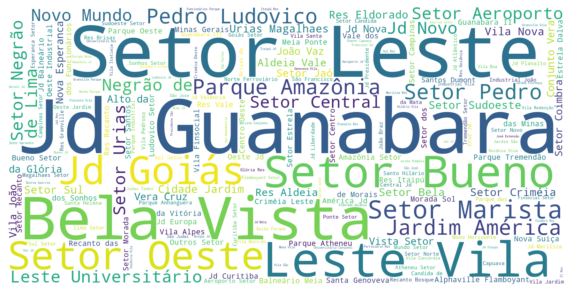

In [ ]:
# concatenar as palavras
all_summary = " ".join(s for s in lista_bairros)

# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update([","])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

# plt.imshow(wordcloud);
wordcloud.to_file("wordcloud.png")
wordcloud.to_file('/content/drive/My Drive/Colab Notebooks/covid/wordcloud.png')

In [ ]:
len(np.unique(bairros))

113